In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

In [2]:
class VBG:

    def __init__(self,comprimento_de_onda_em_nanometros , variação_do_indice_de_refração_em_micro , largura_em_milimetros, largura_de_banda_em_nanometros, indice_de_refração_médio = 1.4867):
        self.comprimento_de_onda = comprimento_de_onda_em_nanometros*10**(-9)
        self.variação_do_indice_de_refração = variação_do_indice_de_refração_em_micro*10**(-6)
        self.largura = largura_em_milimetros*10**(-3)
        self.indice_de_refração_médio = indice_de_refração_médio
        self.largura_de_banda = largura_de_banda_em_nanometros*10**(-9)
        self.Refletividade = 0


    def compor_numerador_da_equação_da_refletividade__equação_8(self,frequência_espacial):
        
        primeira_parte_do_argumento_do_seno = (pi*frequência_espacial*self.largura*self.largura_de_banda)/(self.comprimento_de_onda) 
        segunda_parte_do_argumento_do_seno = (2*pi*self.indice_de_refração_médio*self.largura*self.variação_do_indice_de_refração)/((self.comprimento_de_onda**2)*frequência_espacial)
        self.argumento_do_seno = ((primeira_parte_do_argumento_do_seno**2)-(segunda_parte_do_argumento_do_seno**2))
        
        Numerador = (np.sin(np.sqrt(self.argumento_do_seno)))**2

        return Numerador

    def compor_denominador_da_equação_da_refletividade__equação_8(self,frequência_espacial):
        
        primeira_parte_do_argumento_do_cosseno = (pi*frequência_espacial*self.largura*self.largura_de_banda)/(self.comprimento_de_onda) 
        segunda_parte_do_argumento_do_cosseno = (2 * pi * self.indice_de_refração_médio * self.largura * self.variação_do_indice_de_refração)/((self.comprimento_de_onda**2)*frequência_espacial)
        argumento_do_cosseno = ((primeira_parte_do_argumento_do_cosseno**2)-(segunda_parte_do_argumento_do_cosseno**2))
        
        primeira_parte_do_denominador = (primeira_parte_do_argumento_do_cosseno/segunda_parte_do_argumento_do_cosseno)**2
        segunda_parte_do_denominador = (np.cos(np.sqrt(argumento_do_cosseno)))**2
        
        Denominador = primeira_parte_do_denominador - segunda_parte_do_denominador

        return Denominador

    def compor_numerador_da_equação_da_refletividade__equação_21(self,frequência_espacial):
        
        primeira_parte_da_razao = (pi*frequência_espacial*self.largura*self.largura_de_banda)/(self.comprimento_de_onda) 
        segunda_parte_da_razao = (2*pi*self.indice_de_refração_médio*self.largura*self.variação_do_indice_de_refração)/((self.comprimento_de_onda**2)*frequência_espacial)

        Numerador = 1 - (primeira_parte_da_razao/segunda_parte_da_razao)**2
        
        return Numerador

    def compor_denominador_da_equação_da_refletividade__equação_21(self,frequência_espacial):
        
        primeira_parte_do_argumento_do_seno_hiperbolico = (pi*frequência_espacial*self.largura*self.largura_de_banda)/(self.comprimento_de_onda) 
        segunda_parte_do_argumento_do_seno_hiperbolico = (2 * pi * self.indice_de_refração_médio * self.largura * self.variação_do_indice_de_refração)/((self.comprimento_de_onda**2)*frequência_espacial)
        argumento_do_seno_hiperbolico = ((primeira_parte_do_argumento_do_seno_hiperbolico**2)-(segunda_parte_do_argumento_do_seno_hiperbolico**2))
        
        Denominador = (np.sinh(np.sqrt(argumento_do_seno_hiperbolico)))**2
        
        return Denominador

    def compor_VBG(self):

        periodo_espacial = (self.comprimento_de_onda)/(2*self.indice_de_refração_médio)
        frequência_espacial = 1/periodo_espacial

        numerador_da_equação_da_refletividade__equação_8 = self.compor_numerador_da_equação_da_refletividade__equação_8(frequência_espacial)
        denominador_da_equação_da_refletividade__equação_8 = self.compor_denominador_da_equação_da_refletividade__equação_8(frequência_espacial)

        numerador_da_equação_da_refletividade__equação_21 = self.compor_numerador_da_equação_da_refletividade__equação_21(frequência_espacial)
        denominador_da_equação_da_refletividade__equação_21 = self.compor_denominador_da_equação_da_refletividade__equação_21(frequência_espacial)
        
        self.Refletividade__equação_8 = numerador_da_equação_da_refletividade__equação_8/denominador_da_equação_da_refletividade__equação_8
        '''
        for i in range(len(self.Refletividade__equação_8)):
            if np.isnan(self.Refletividade__equação_8[i]):
                self.Refletividade__equação_8[i]=0
        '''
        self.Refletividade__equação_21 = 1/(1+numerador_da_equação_da_refletividade__equação_21/denominador_da_equação_da_refletividade__equação_21)
        
        for i in range(len(self.Refletividade__equação_21)):
            if np.isnan(self.Refletividade__equação_21[i]):
                self.Refletividade__equação_21[i]=0
        
        self.Refletividade = self.Refletividade__equação_21 + self.Refletividade__equação_8



In [3]:
numero_de_pontos_para_plotar = 100000
largura_de_banda_em_nanometros = np.linspace(-5,5,numero_de_pontos_para_plotar)
comprimento_de_onda_em_nanometros = 1550
variação_do_indice_de_refração_em_micro = 80
largura_em_milimetros = 8
indice_de_refração_médio = 1.4867

In [7]:
vbg = VBG(comprimento_de_onda_em_nanometros , variação_do_indice_de_refração_em_micro , largura_em_milimetros, largura_de_banda_em_nanometros, indice_de_refração_médio = 1.4867)
vbg.compor_VBG()
refletividade = vbg.Refletividade__equação_8

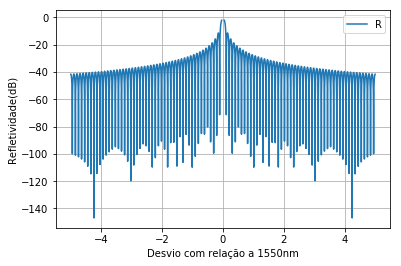

In [8]:
plt.grid(True)
plt.plot(largura_de_banda_em_nanometros,10*np.log10(refletividade))
plt.legend('Refletividade da VBG')
plt.xlabel('Desvio com relação a 1550nm')
plt.ylabel('Refletividade(dB)')
#plt.axis([-5,5,-250,-100])
plt.show()

